# import and first look

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


Import data

In [2]:
housing = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# EDA

There Is numerical variables and categorical variables.

In [4]:
# Get list of numerical variables
print(list(housing.select_dtypes('number').columns))

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [5]:
# Get list of categorical variables
print(list(housing.select_dtypes('object').columns))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Because there are eighty categories we will try to concentrate on eight categories of each type.

I chose the variables below: 

numerical:

LotArea: Lot size in square feet

YearBuilt: Original construction date

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

FullBath: Full bathrooms above grade

Bedroom: Number of bedrooms above basement level

itchen: Number of kitchens

categorical:

MSZoning: general zoning classification of the sale

LotShape: general shape of the property

Functional: Home functionality rating

Neighborhood: physical location within city limits

CentralAir: central air conditioning

SaleCondition: condition of sale

YrSold: year sold (YYYY)

In [6]:
numerical = [
    'SalePrice',
    'LotArea',
    'YearBuilt',
    '1stFlrSF',
    '2ndFlrSF',
    'FullBath',
    'BedroomAbvGr',
    'KitchenAbvGr'
]

categorical = [
    'MSZoning',
    'LotShape',
    'Functional',
    'Neighborhood',
    'CentralAir',
    'SaleCondition',
    'HouseStyle',
    'YrSold'
]

housing = housing[numerical + categorical]
housing.shape

(1460, 16)

SalePrice - the property's sale price in dollars. This is the target variable that I am trying to predict.

Get summary statistics for SalePrice

In [7]:
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Let’s define a new variable, Age, as the year in which the house was sold minus the year in which the house was built.

In [8]:
# Create 'Age' variable and replace 'YearBuilt' with it
housing['Age'] = housing['YrSold'] - housing['YearBuilt']
numerical.remove('YearBuilt')
numerical.append('Age')

# Plot numerical variables

Let's start with histograms

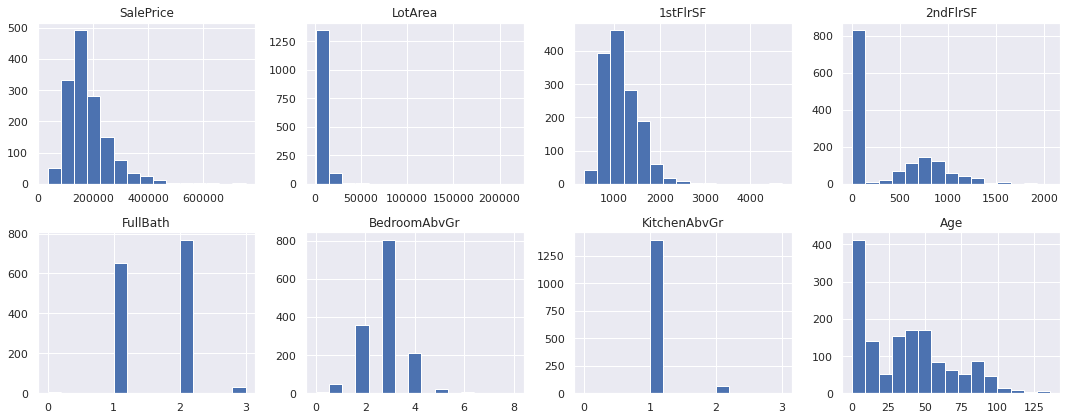

In [9]:
housing[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.tight_layout()
plt.show()

Plot scatters between SalePrice, LotArea,1stFlrSF and 2ndFlrSF

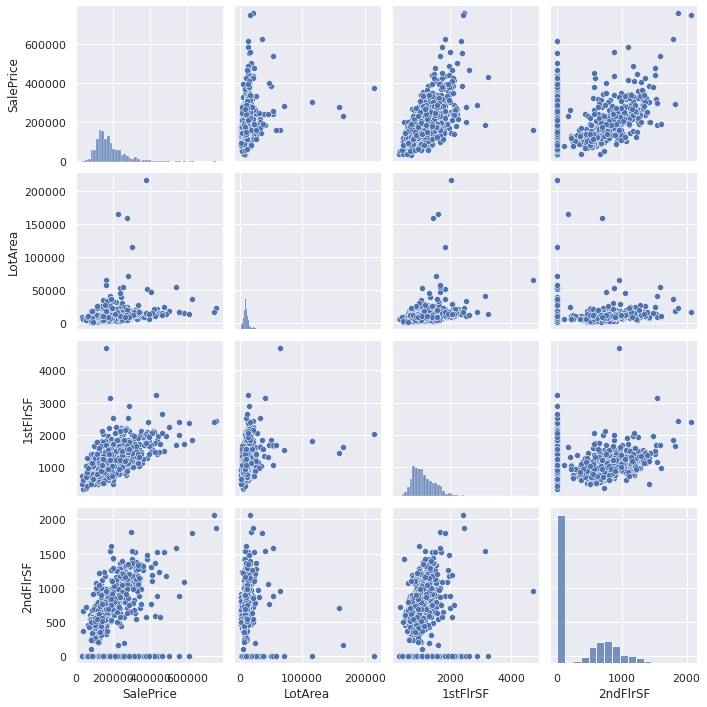

In [10]:
sns.pairplot(housing[numerical[:4]])
plt.show()

Plot scatters between SalePrice, FullBath,BedroomAbvGr and Age

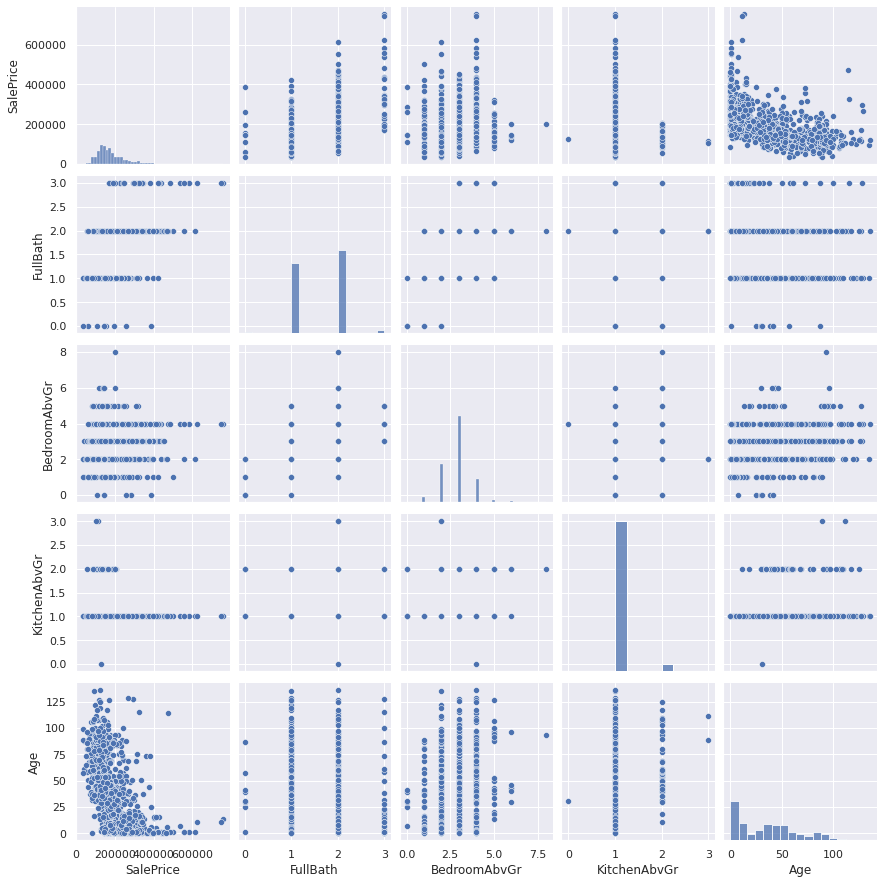

In [11]:
sns.pairplot(housing[['SalePrice'] + numerical[4:]])
plt.show()

The output shows that 1stFlrSF and 2ndFlrSF of the house is positively correlated with SalePrice, while Age has a negative non-linear relationship with SalePrice.

Plot scatters between SalePrice, LotArea, 1stFlrSF and 2ndFlrSF

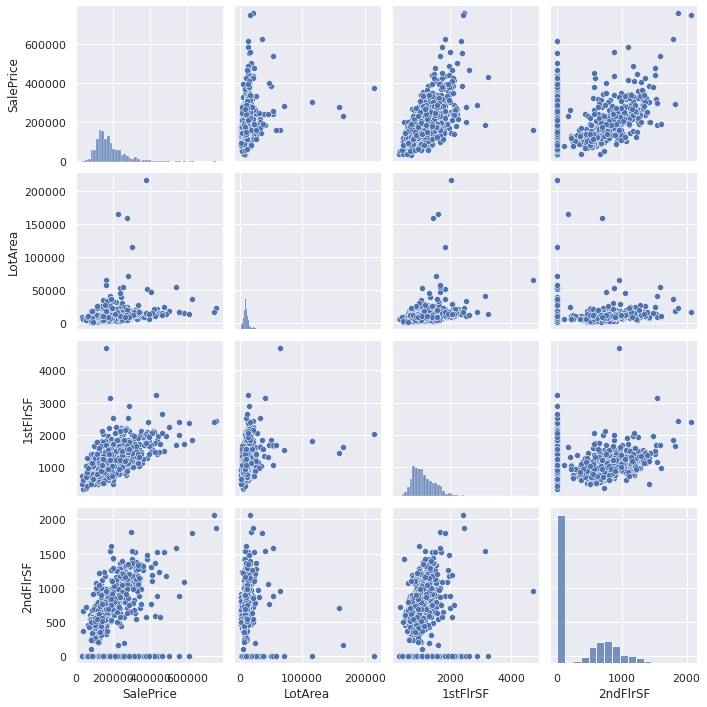

In [12]:
sns.pairplot(housing[numerical[:4]])
plt.show()

# Plot categorical variable

Let's start with bar plots

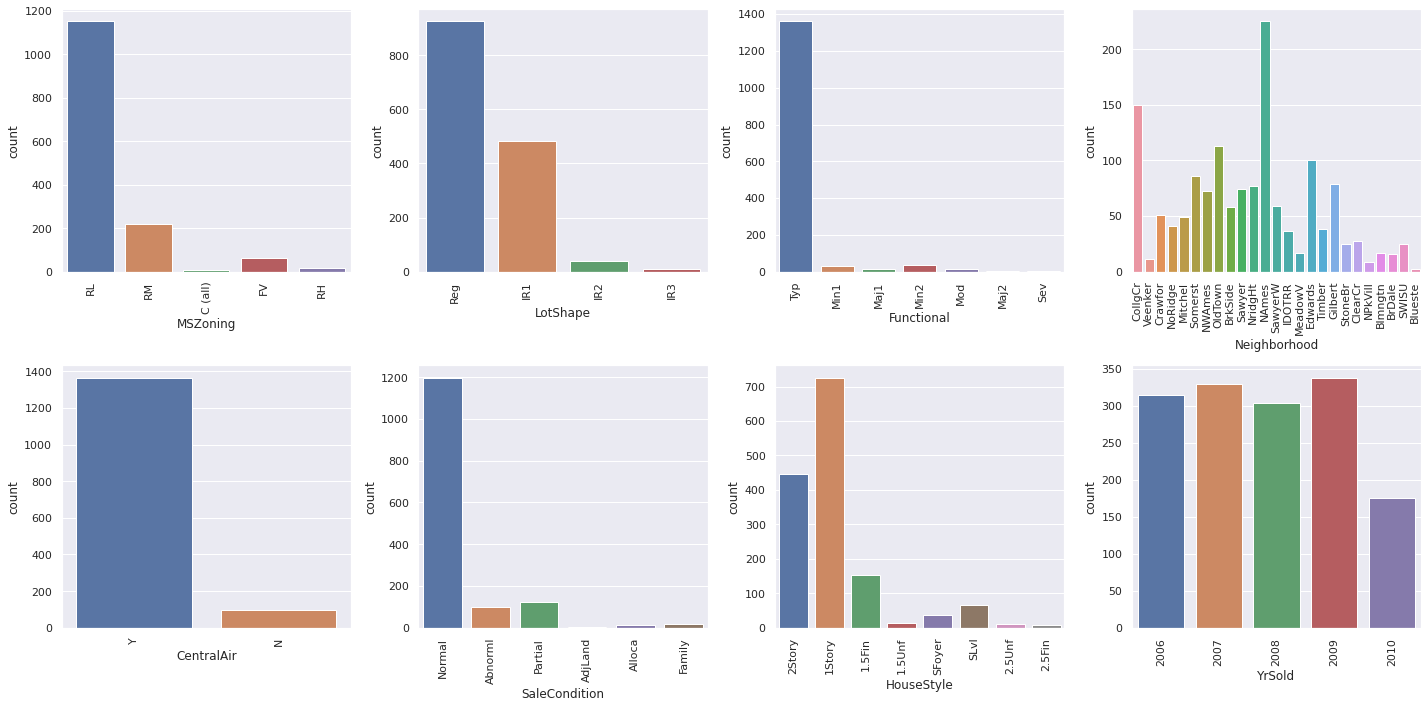

In [13]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(housing[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

fig.tight_layout()
plt.show()

In order to avoid noises that will interfere with us in calculating the statistics, we will remove any categories with less than 30 values:

In [14]:
def above30(series):
    counts = series.value_counts()
    return list(counts[counts >= 30].index)

In [15]:
# Apply function to each categorical variable
categories_to_keep = housing[categorical].apply(above30, axis=0)
print(categories_to_keep)

# Loop through categorical variables to keep only categories with more than 30 observations
for variables in categorical:
    housing = housing.loc[housing[variables].isin(categories_to_keep[variables])]
    

MSZoning                                              [RL, RM, FV]
LotShape                                           [Reg, IR1, IR2]
Functional                                       [Typ, Min2, Min1]
Neighborhood     [NAmes, CollgCr, OldTown, Edwards, Somerst, Gi...
CentralAir                                                  [Y, N]
SaleCondition                           [Normal, Partial, Abnorml]
HouseStyle                  [1Story, 2Story, 1.5Fin, SLvl, SFoyer]
YrSold                              [2009, 2007, 2006, 2008, 2010]
dtype: object


In [16]:
housing.shape

(1190, 17)

Plot categorical variables

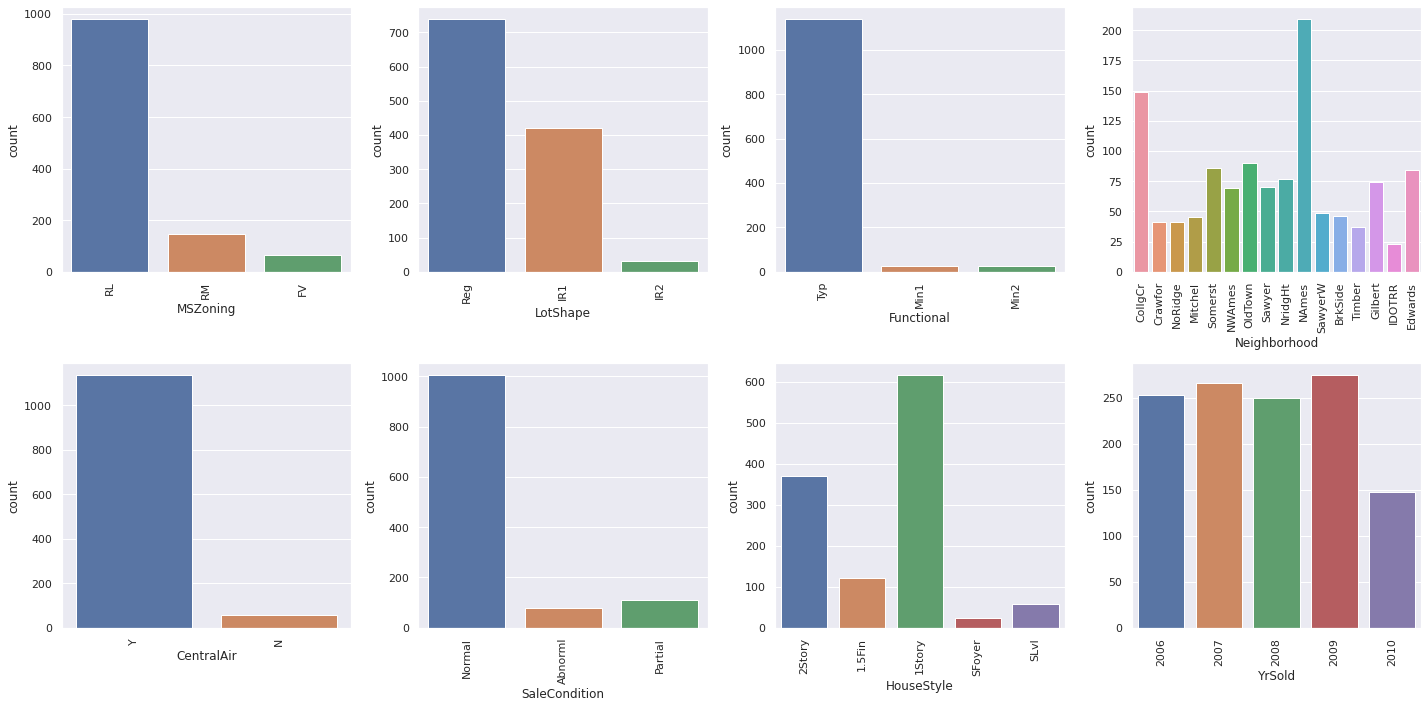

In [17]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(housing[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

fig.tight_layout()
plt.show()

Sort neighborhoods by median SalePrice from lowest to highest

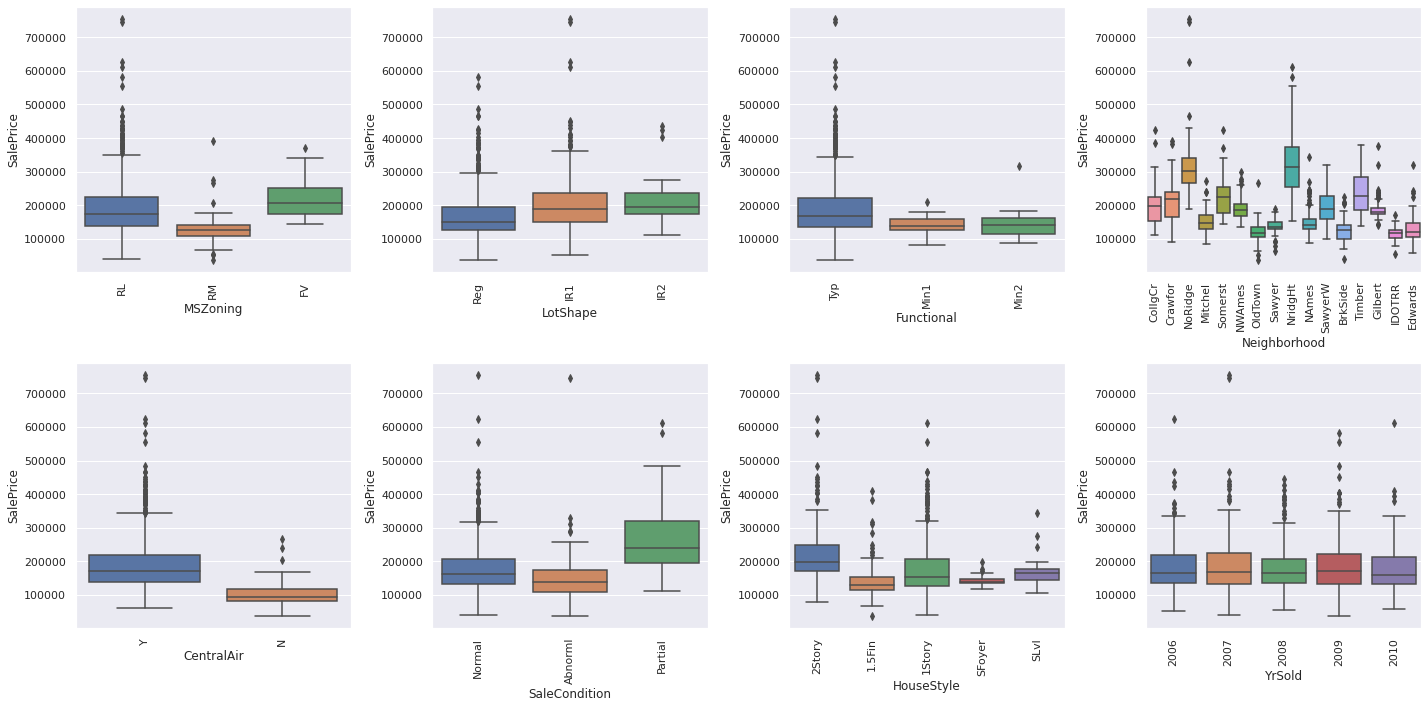

In [18]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=housing, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        
fig.tight_layout()
plt.show()

Here, we have iterated through every subplot to produce the visualization between all categorical variables and the SalePrice. 

We can notice a number of things:

1.The zoning classification, the shape of the property affect the property price. And so are the style and the sale condition.

2.The funcionality of the property affect the price but not dramatically.

3.House prices have not changed significantly over the years.

4. People probably prefer house with a central air.

The difference in house prices on each street is not clearly. Therefore we will try to rearrange the data.

Plot box plots between SalePrice and categorical variables

In [19]:
sorted_nb = housing.groupby(['Neighborhood'])['SalePrice'].median().sort_values()
#print(sorted_nb)

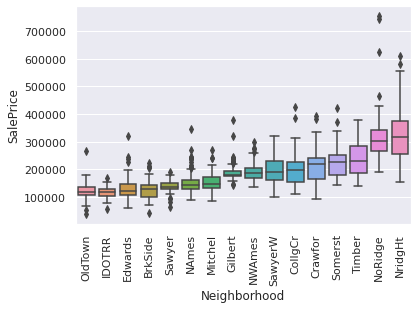

In [20]:
# Create sorted boxplot between Neighborhood and SalePrice
sns.boxplot(x=housing['Neighborhood'], y=housing['SalePrice'], order=list(sorted_nb.index))
plt.xticks(rotation=90)
plt.show()

# Conditional plots

In [21]:
## Reset defaults to make font smaller, figure bigger, and remove grid
sns.set(style='white', palette="deep", font_scale=0.9, rc={"figure.figsize": [20, 10]})

Conditional plot that explores the relationship between Age and SalePrice that conditions on YrSold as columns and SaleCondition as rows. Markers in the scatterplot colored based on CentralAir.

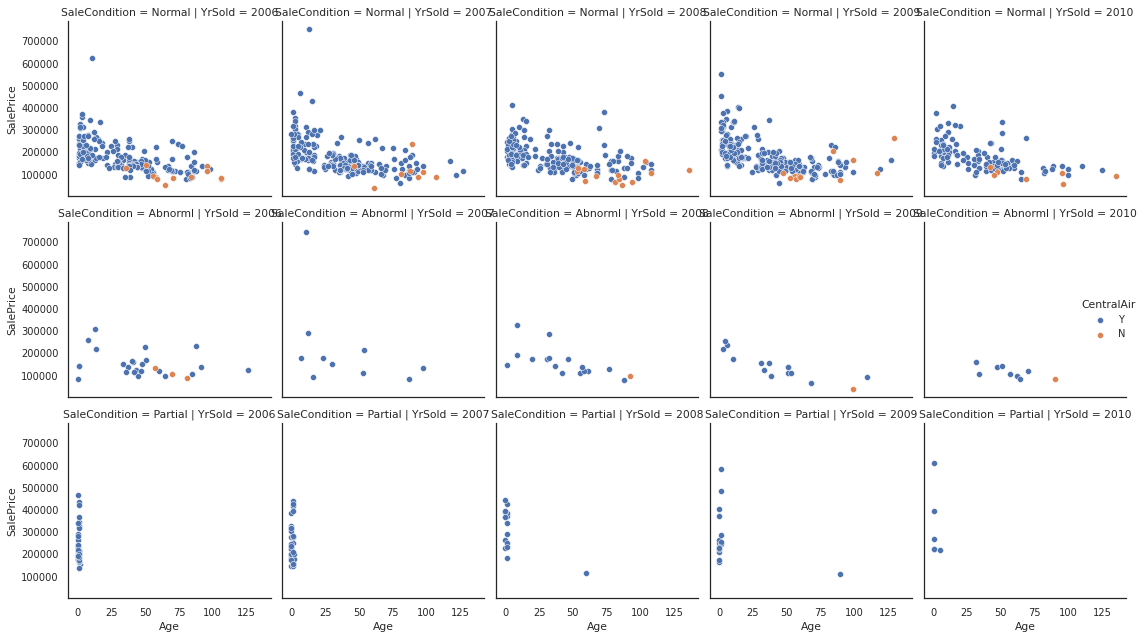

In [22]:
cond_plot = sns.FacetGrid(data=housing, col='YrSold', row='SaleCondition', hue='CentralAir')
cond_plot.map(sns.scatterplot, 'Age', 'SalePrice').add_legend()
plt.tight_layout()
plt.show()

We can see that houses with central air are mostly old houses. However, the other parameters are not significantly affected by the year the house built on.

Conditional plot that explores the relationship between Age and SalePrice that conditions on LotShape as columns and MSZoning as rows. Markers in the scatterplot be colored based on Neighborhood.

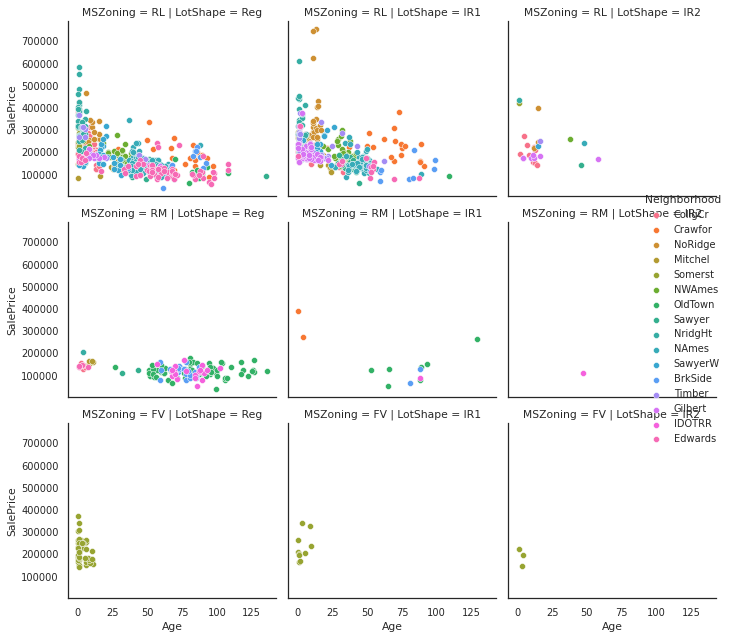

In [23]:
cond_plot = sns.FacetGrid(data=housing, col='LotShape', row='MSZoning', hue='Neighborhood')
cond_plot.map(sns.scatterplot, 'Age', 'SalePrice').add_legend()
plt.tight_layout()
plt.show()